In [37]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import researchpy as rp
import scipy.stats as stats

hinded = pd.read_csv("tudengid_moodlest_hinded.csv", encoding='utf-8')


# Seminaride seos punktidega

Text(0.5, 0, 'Seminaris käimise punktisumma')

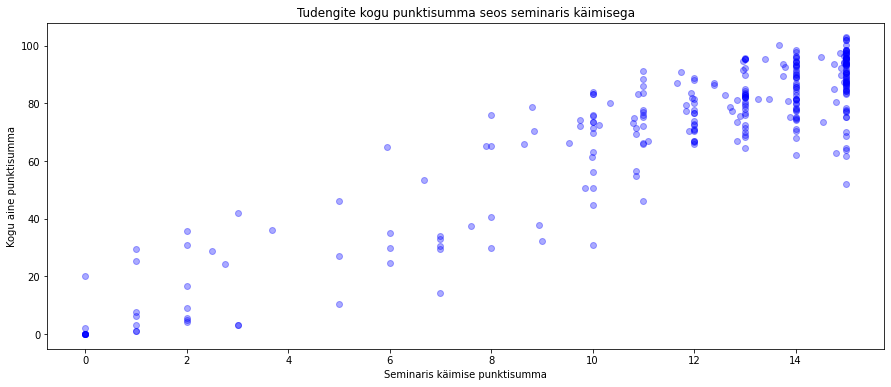

In [39]:
seminarid = hinded[["Seminaride punktid kokku (Punktid)", "Lõpphinne (Punktid)"]]
seminarid_df = pd.DataFrame(seminarid)
seminarid_df["Seminaride punktid kokku (Punktid)"] = seminarid_df["Seminaride punktid kokku (Punktid)"].replace("-", 0)
seminarid_df["Seminaride punktid kokku (Punktid)"] = pd.to_numeric(seminarid_df["Seminaride punktid kokku (Punktid)"])
seminarid_df.sort_values(by="Seminaride punktid kokku (Punktid)")

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(seminarid_df["Seminaride punktid kokku (Punktid)"], seminarid_df["Lõpphinne (Punktid)"], 'o', color='blue', alpha = 1/3);

plt.title("Tudengite kogu punktisumma seos seminaris käimisega")
plt.ylabel("Kogu aine punktisumma")
plt.xlabel("Seminaris käimise punktisumma")

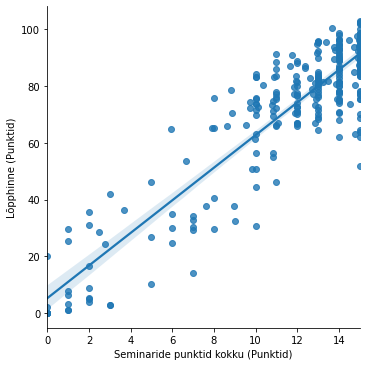

In [40]:
# Correlation and Scatterplots: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html#adding-a-best-fit-line
sns.lmplot(x="Seminaride punktid kokku (Punktid)", y="Lõpphinne (Punktid)", data=seminarid_df);

In [41]:
# https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html#coefficient-of-correlation
stats.pearsonr(seminarid_df["Seminaride punktid kokku (Punktid)"], seminarid_df["Lõpphinne (Punktid)"])

# Vastus: (0.9058296698301984, 3.4892417118712244e-110)
# 1. Pearson’s r
# 2. A p-value. This is the probability that the true value of r is zero (no correlation).

(0.9058296698301984, 3.4892417118712244e-110)

## T-test
Selle t-testi puhul on selgelt näha, et kui seminaris käia rohkem kui 10 korda, siis on keskmine hinne 83.7 ning kui käia 10 või vähem kordi, siis on keskmine hinne 36.8.

In [42]:
# https://www.pythonfordatascience.org/independent-samples-t-test-python/

summary, results = rp.ttest(group1= seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Seminaride punktid kokku (Punktid)"] > 11], group1_name= "Aktiivsed seminarides käijad",
                            group2= seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Seminaride punktid kokku (Punktid)"] <= 11], group2_name= "Vähemaktiivsed seminarides käijad")
print(summary)
print(results)

# 11+ seminari
# Aktiivsed seminarides käijad  199 tudengit, 84.780050 
# Vähemaktiivsed seminarides käijad   93 tudengit, 44.895269 
# p = 0.0000

                            Variable      N       Mean         SD        SE  \
0       Aktiivsed seminarides käijad  199.0  84.780050  10.087819  0.715107   
1  Vähemaktiivsed seminarides käijad   93.0  44.895269  29.128878  3.020524   
2                           combined  292.0  72.077021  26.152826  1.530478   

   95% Conf.   Interval  
0  83.369848  86.190253  
1  38.896248  50.894290  
2  69.064810  75.089231  
                                  Independent t-test   results
0  Difference (Aktiivsed seminarides käijad - Väh...   39.8848
1                              Degrees of freedom =   290.0000
2                                               t =    17.2546
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     1.0000
5                          Difference > 0 p value =     0.0000
6                                       Cohen's d =     2.1673
7                                       Hedge's g =     2.1617
8           

In [43]:
yle11 = seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Seminaride punktid kokku (Punktid)"] > 11].mean()
alla11 = seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Seminaride punktid kokku (Punktid)"] <= 11].mean()

print(yle11)
print(alla11)

84.7800502512563
44.8952688172043


In [44]:
# Welch t-test
# https://www.geeksforgeeks.org/welchs-t-test-in-python/

print(stats.ttest_ind(seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Seminaride punktid kokku (Punktid)"] > 11], 
                      seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Seminaride punktid kokku (Punktid)"] <= 11], 
                      equal_var = False))

Ttest_indResult(statistic=12.849394346019832, pvalue=4.3830971808064894e-23)


In [45]:
# Mann-Whitney U Test

from scipy.stats import mannwhitneyu
mannwhitneyu(seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Seminaride punktid kokku (Punktid)"] > 11], 
             seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Seminaride punktid kokku (Punktid)"] <= 11])

MannwhitneyuResult(statistic=1593.0, pvalue=2.209758911788275e-30)

In [46]:
summary, results = rp.ttest(group1= seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Lõpphinne (Punktid)"] > 90], group1_name= "Hinne A",
                            group2= seminarid_df["Lõpphinne (Punktid)"][seminarid_df["Lõpphinne (Punktid)"] <= 90], group2_name= "Hinne mitte A")
print(summary)
print(results)

# Hinne A   72 tudengit, 95.121806 
# Hinne mitte A  220 tudengit,  64.535091 
# p = 0.0000

        Variable      N       Mean         SD        SE  95% Conf.   Interval
0        Hinne A   72.0  95.121806   2.983652  0.351627  94.420682  95.822929
1  Hinne mitte A  220.0  64.535091  25.965650  1.750604  61.084904  67.985278
2       combined  292.0  72.077021  26.152826  1.530478  69.064810  75.089231
                        Independent t-test   results
0  Difference (Hinne A - Hinne mitte A) =    30.5867
1                    Degrees of freedom =   290.0000
2                                     t =     9.9625
3                 Two side test p value =     0.0000
4                Difference < 0 p value =     1.0000
5                Difference > 0 p value =     0.0000
6                             Cohen's d =     1.3526
7                             Hedge's g =     1.3491
8                        Glass's delta1 =    10.2514
9                      Point-Biserial r =     0.5050


Text(0.5, 0, 'Seminaris käimise punktisumma')

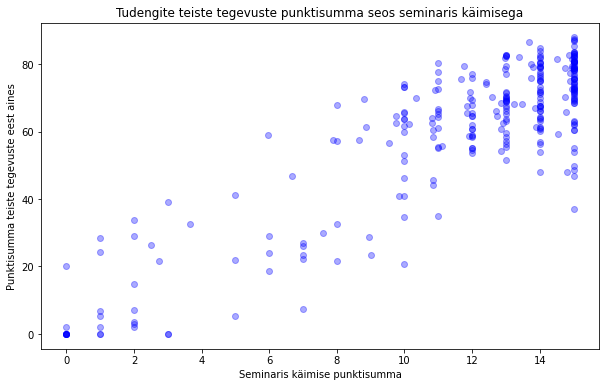

In [47]:
seminarid_df["Lõpphinne seminaripunktideta"] = seminarid_df["Lõpphinne (Punktid)"] - seminarid_df["Seminaride punktid kokku (Punktid)"]
seminarid_df.sort_values(by="Seminaride punktid kokku (Punktid)")

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(seminarid_df["Seminaride punktid kokku (Punktid)"], seminarid_df["Lõpphinne seminaripunktideta"], 'o',  color='blue', alpha = 1/3);

plt.title("Tudengite teiste tegevuste punktisumma seos seminaris käimisega")
plt.ylabel("Punktisumma teiste tegevuste eest aines")
plt.xlabel("Seminaris käimise punktisumma")



In [48]:
stats.pearsonr(seminarid_df["Seminaride punktid kokku (Punktid)"], seminarid_df["Lõpphinne seminaripunktideta"])

(0.8701415122370195, 4.029941177401672e-91)

In [49]:
# https://www.pythonfordatascience.org/independent-samples-t-test-python/

summary, results = rp.ttest(group1= seminarid_df["Lõpphinne seminaripunktideta"][seminarid_df["Seminaride punktid kokku (Punktid)"] > 11], group1_name= "Aktiivsed seminarides käijad",
                            group2= seminarid_df["Lõpphinne seminaripunktideta"][seminarid_df["Seminaride punktid kokku (Punktid)"] <= 11], group2_name= "Vähemaktiivsed seminarides käijad")
print(summary)
print(results)

# 11+ seminari
# Aktiivsed seminarides käijad  199 tudengit, 70. 866985 
# Vähemaktiivsed seminarides käijad   93 tudengit, 38.136667 
# p = 0.0000

                            Variable      N       Mean         SD        SE  \
0       Aktiivsed seminarides käijad  199.0  70.866985   9.697521  0.687439   
1  Vähemaktiivsed seminarides käijad   93.0  38.136667  25.659219  2.660737   
2                           combined  292.0  60.442603  22.482537  1.315691   

   95% Conf.   Interval  
0  69.511343  72.222627  
1  32.852213  43.421120  
2  57.853126  63.032079  
                                  Independent t-test   results
0  Difference (Aktiivsed seminarides käijad - Väh...   32.7303
1                              Degrees of freedom =   290.0000
2                                               t =    15.7682
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     1.0000
5                          Difference > 0 p value =     0.0000
6                                       Cohen's d =     1.9806
7                                       Hedge's g =     1.9755
8           

# Loengute seos punktidega

Text(0.5, 0, 'Loengu vaatamiste arv')

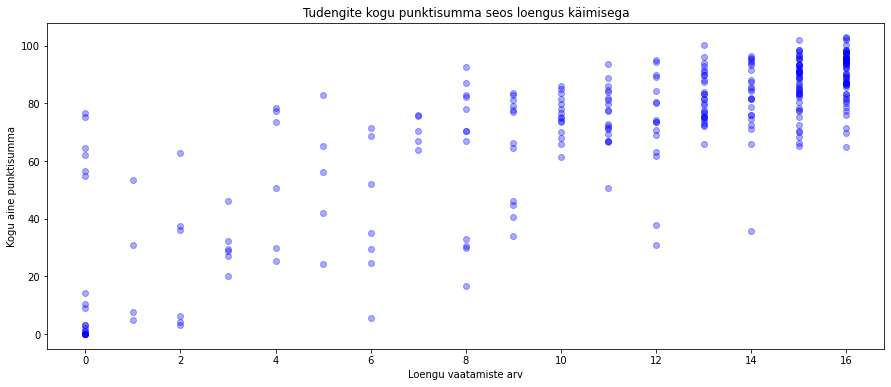

In [50]:
loengud = hinded[["Osalemine:Loengutes osalemine (Punktid)", "Lõpphinne (Punktid)"]]
loengud_df = pd.DataFrame(loengud)
loengud_df["Osalemine:Loengutes osalemine (Punktid)"] = loengud_df["Osalemine:Loengutes osalemine (Punktid)"].replace("-", 0)
loengud_df["Osalemine:Loengutes osalemine (Punktid)"] = pd.to_numeric(loengud_df["Osalemine:Loengutes osalemine (Punktid)"])
loengud_df.sort_values(by="Osalemine:Loengutes osalemine (Punktid)")

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(loengud_df["Osalemine:Loengutes osalemine (Punktid)"]*2, loengud_df["Lõpphinne (Punktid)"], 'o', color='blue', alpha = 1/3);

plt.title("Tudengite kogu punktisumma seos loengus käimisega")
plt.ylabel("Kogu aine punktisumma")
plt.xlabel("Loengu vaatamiste arv")

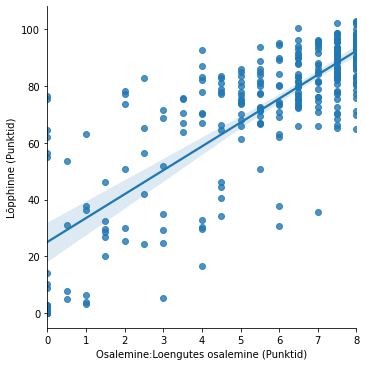

In [51]:
sns.lmplot(x="Osalemine:Loengutes osalemine (Punktid)", y="Lõpphinne (Punktid)", data=loengud_df);

In [52]:
stats.pearsonr(loengud_df["Osalemine:Loengutes osalemine (Punktid)"], loengud_df["Lõpphinne (Punktid)"])

(0.803904305850867, 2.104636640670655e-67)

In [53]:
summary, results = rp.ttest(group1= loengud_df["Lõpphinne (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] > 5], group1_name= "Aktiivsed loengute kuulajad",
                            group2= loengud_df["Lõpphinne (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] <= 5], group2_name= "Vähemaktiivsed loengute kuulajad")
print(summary)
print(results)


# Aktiivsed loengute kuulajad  193 tudengit,  84.377150 
# Vähemaktiivsed loengute kuulajad   99 tudengit, 48.097980
# p = 0.0000

                           Variable      N       Mean         SD        SE  \
0       Aktiivsed loengute kuulajad  193.0  84.377150  11.760261  0.846522   
1  Vähemaktiivsed loengute kuulajad   99.0  48.097980  29.684913  2.983446   
2                          combined  292.0  72.077021  26.152826  1.530478   

   95% Conf.   Interval  
0  82.707473  86.046828  
1  42.177428  54.018531  
2  69.064810  75.089231  
                                  Independent t-test   results
0  Difference (Aktiivsed loengute kuulajad - Vähe...   36.2792
1                              Degrees of freedom =   290.0000
2                                               t =    14.8728
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     1.0000
5                          Difference > 0 p value =     0.0000
6                                       Cohen's d =     1.8386
7                                       Hedge's g =     1.8338
8               

In [54]:
print(stats.ttest_ind(loengud_df["Lõpphinne (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] > 5], 
                      loengud_df["Lõpphinne (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] <= 5], 
                      equal_var = False))

Ttest_indResult(statistic=11.698363967852702, pvalue=2.991134132032248e-21)


In [55]:
from scipy.stats import mannwhitneyu
mannwhitneyu(loengud_df["Lõpphinne (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] > 5], 
             loengud_df["Lõpphinne (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] <= 5])

MannwhitneyuResult(statistic=2085.0, pvalue=3.9757114800266414e-28)

Text(0.5, 0, 'Loengute vaatamise arv')

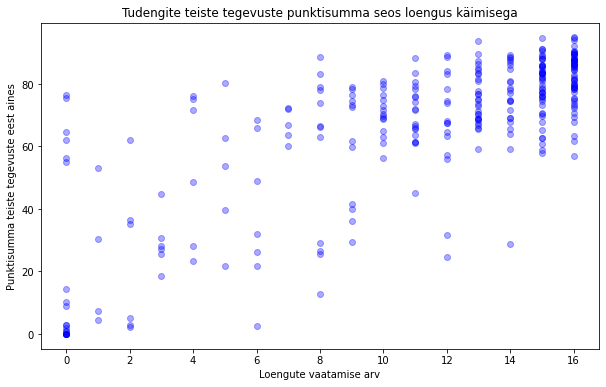

In [56]:
loengud_df["Lõpphinne loengute punktideta"] = loengud_df["Lõpphinne (Punktid)"] - loengud_df["Osalemine:Loengutes osalemine (Punktid)"]
loengud_df.sort_values(by="Osalemine:Loengutes osalemine (Punktid)")

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(loengud_df["Osalemine:Loengutes osalemine (Punktid)"]*2, loengud_df["Lõpphinne loengute punktideta"], 'o',  color='blue', alpha = 1/3);

plt.title("Tudengite teiste tegevuste punktisumma seos loengus käimisega")
plt.ylabel("Punktisumma teiste tegevuste eest aines")
plt.xlabel("Loengute vaatamise arv")

In [57]:
stats.pearsonr(loengud_df["Osalemine:Loengutes osalemine (Punktid)"], loengud_df["Lõpphinne loengute punktideta"])

(0.7658442646700916, 1.484149747130924e-57)

In [58]:
summary, results = rp.ttest(group1= loengud_df["Lõpphinne loengute punktideta"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] > 5], group1_name= "Aktiivsed loengute kuulajad",
                            group2= loengud_df["Lõpphinne loengute punktideta"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] <= 5], group2_name= "Vähemaktiivsed loengute kuulajad")
print(summary)
print(results)


# Aktiivsed loengute kuulajad  193 tudengit,  77.255389
# Vähemaktiivsed loengute kuulajad   99 tudengit, 45.502020
# p = 0.0000

                           Variable      N       Mean         SD        SE  \
0       Aktiivsed loengute kuulajad  193.0  77.255389  11.404359  0.820904   
1  Vähemaktiivsed loengute kuulajad   99.0  45.502020  28.451275  2.859461   
2                          combined  292.0  66.489692  24.189718  1.415596   

   95% Conf.   Interval  
0  75.636241  78.874536  
1  39.827513  51.176527  
2  63.703587  69.275797  
                                  Independent t-test   results
0  Difference (Aktiivsed loengute kuulajad - Vähe...   31.7534
1                              Degrees of freedom =   290.0000
2                                               t =    13.5441
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     1.0000
5                          Difference > 0 p value =     0.0000
6                                       Cohen's d =     1.6744
7                                       Hedge's g =     1.6700
8               

In [59]:
yle5 = loengud_df["Lõpphinne loengute punktideta"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] > 5].mean()
alla5 = loengud_df["Lõpphinne loengute punktideta"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] <= 5].mean()

print(yle5)
print(alla5)

77.25538860103629
45.50202020202019


Text(0.5, 0, 'Loengu vaatamiste arv')

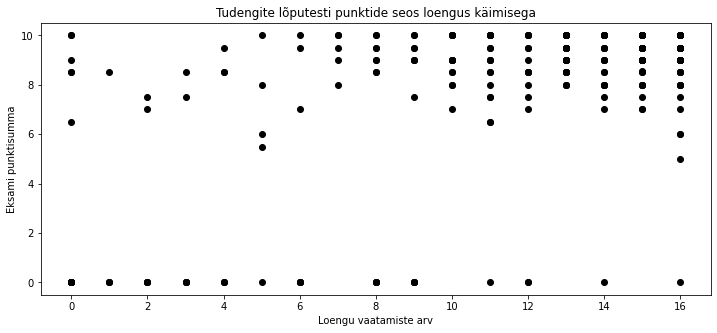

In [60]:
loengud = hinded[["Osalemine:Loengutes osalemine (Punktid)", "Lõputest kokku (Punktid)"]]
loengud_df = pd.DataFrame(loengud)
loengud_df["Osalemine:Loengutes osalemine (Punktid)"] = loengud_df["Osalemine:Loengutes osalemine (Punktid)"].replace("-", 0)
loengud_df["Osalemine:Loengutes osalemine (Punktid)"] = pd.to_numeric(loengud_df["Osalemine:Loengutes osalemine (Punktid)"])
loengud_df["Lõputest kokku (Punktid)"] = loengud_df["Lõputest kokku (Punktid)"].replace("-", 0)
loengud_df["Lõputest kokku (Punktid)"] = pd.to_numeric(loengud_df["Lõputest kokku (Punktid)"])
loengud_df.sort_values(by="Osalemine:Loengutes osalemine (Punktid)")

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(5)

plt.plot(loengud_df["Osalemine:Loengutes osalemine (Punktid)"]*2, loengud_df["Lõputest kokku (Punktid)"], 'o', color='black');

plt.title("Tudengite lõputesti punktide seos loengus käimisega")
plt.ylabel("Eksami punktisumma")
plt.xlabel("Loengu vaatamiste arv")

In [61]:
stats.pearsonr(loengud_df["Osalemine:Loengutes osalemine (Punktid)"], loengud_df["Lõputest kokku (Punktid)"])

(0.6253811591029618, 4.27501390807321e-33)

In [62]:
summary, results = rp.ttest(group1= loengud_df["Lõputest kokku (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] > 5], group1_name= "Aktiivsed loengute kuulajad",
                            group2= loengud_df["Lõputest kokku (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] <= 5], group2_name= "Vähemaktiivsed loengute kuulajad")
print(summary)
print(results)


# Aktiivsed loengute kuulajad  193 tudengit,  84.377150 
# Vähemaktiivsed loengute kuulajad   99 tudengit, 48.097980
# p = 0.0000

                           Variable      N      Mean        SD        SE  \
0       Aktiivsed loengute kuulajad  193.0  8.855233  1.724378  0.124123   
1  Vähemaktiivsed loengute kuulajad   99.0  5.080808  4.461689  0.448417   
2                          combined  292.0  7.575548  3.445185  0.201614   

   95% Conf.  Interval  
0   8.610413  9.100054  
1   4.190940  5.970676  
2   7.178741  7.972355  
                                  Independent t-test   results
0  Difference (Aktiivsed loengute kuulajad - Vähe...    3.7744
1                              Degrees of freedom =   290.0000
2                                               t =    10.3539
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     1.0000
5                          Difference > 0 p value =     0.0000
6                                       Cohen's d =     1.2800
7                                       Hedge's g =     1.2767
8                           

In [63]:
print(stats.ttest_ind(loengud_df["Lõputest kokku (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] > 5], 
                      loengud_df["Lõputest kokku (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] <= 5], 
                      equal_var = False))

Ttest_indResult(statistic=8.112184554349003, pvalue=6.594661621756631e-13)


In [64]:
from scipy.stats import mannwhitneyu
mannwhitneyu(loengud_df["Lõputest kokku (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] > 5], 
             loengud_df["Lõputest kokku (Punktid)"][loengud_df["Osalemine:Loengutes osalemine (Punktid)"] <= 5])

MannwhitneyuResult(statistic=4988.5, pvalue=5.821199512975004e-12)

# Hea õppimise harjumuse seos punktidega

Text(0.5, 0, 'Hea õppimise harjumuse ülesande punktisumma')

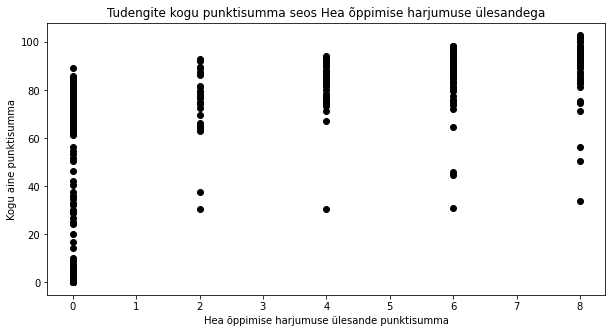

In [65]:
hea_harjumus = hinded[['TBA: sügiskuine interventsioon kokku (Punktid)', "Lõpphinne (Punktid)"]]
hea_harjumus_df = pd.DataFrame(hea_harjumus)
hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'] = hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'].replace("-", 0)
hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'] = pd.to_numeric(hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'])
hea_harjumus_df.sort_values(by='TBA: sügiskuine interventsioon kokku (Punktid)',)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.plot(hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'], hea_harjumus_df["Lõpphinne (Punktid)"], 'o', color='black');

plt.title("Tudengite kogu punktisumma seos Hea õppimise harjumuse ülesandega")
plt.ylabel("Kogu aine punktisumma")
plt.xlabel("Hea õppimise harjumuse ülesande punktisumma")

In [66]:
stats.pearsonr(hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'], hea_harjumus_df["Lõpphinne (Punktid)"])

(0.5906560601148348, 7.545239684433709e-29)

In [67]:
summary, results = rp.ttest(group1= hea_harjumus_df["Lõpphinne (Punktid)"][hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'] > 4], group1_name= "Aktiivsed ülesande täitjad",
                            group2= hea_harjumus_df["Lõpphinne (Punktid)"][hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'] <= 4], group2_name= "Vähemaktiivsed ülesande täitjad")
print(summary)
print(results)

# 4+ punktisumma
# Aktiivsed ülesande täitjad  114 tudengit, 87.831667  
# Vähemaktiivsed ülesande täitjad  178 tudengit, 61.986966
# p = 0.0000


                          Variable      N       Mean         SD        SE  \
0       Aktiivsed ülesande täitjad  114.0  87.831667  12.965570  1.214337   
1  Vähemaktiivsed ülesande täitjad  178.0  61.986966  27.475879  2.059404   
2                         combined  292.0  72.077021  26.152826  1.530478   

   95% Conf.   Interval  
0  85.425846  90.237487  
1  57.922820  66.051112  
2  69.064810  75.089231  
                                  Independent t-test   results
0  Difference (Aktiivsed ülesande täitjad - Vähem...   25.8447
1                              Degrees of freedom =   290.0000
2                                               t =     9.3916
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     1.0000
5                          Difference > 0 p value =     0.0000
6                                       Cohen's d =     1.1266
7                                       Hedge's g =     1.1237
8                   

In [68]:
print(stats.ttest_ind(hea_harjumus_df["Lõpphinne (Punktid)"][hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'] > 4], 
                      hea_harjumus_df["Lõpphinne (Punktid)"][hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'] <= 4], 
                      equal_var = False))


Ttest_indResult(statistic=10.810219500992797, pvalue=7.122143083993489e-23)


Text(0.5, 0, '"Hea õppimise harjumuse" ülesande punktisumma')

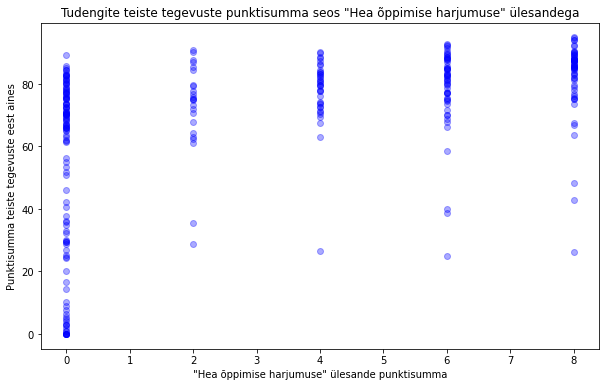

In [69]:
hea_harjumus_df['Lõpphinne hea harjumuse punktideta'] = hea_harjumus_df["Lõpphinne (Punktid)"] - hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)']
hea_harjumus_df.sort_values(by='TBA: sügiskuine interventsioon kokku (Punktid)',)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'], hea_harjumus_df["Lõpphinne hea harjumuse punktideta"], 'o',  color='blue', alpha = 1/3);

plt.title("Tudengite teiste tegevuste punktisumma seos \"Hea õppimise harjumuse\" ülesandega")
plt.ylabel("Punktisumma teiste tegevuste eest aines")
plt.xlabel("\"Hea õppimise harjumuse\" ülesande punktisumma")

In [70]:
stats.pearsonr(hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'], hea_harjumus_df["Lõpphinne hea harjumuse punktideta"])

(0.500605771599274, 6.302313522332614e-20)

In [71]:
summary, results = rp.ttest(group1= hea_harjumus_df["Lõpphinne hea harjumuse punktideta"][hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'] > 4], group1_name= "Aktiivsed ülesande täitjad",
                            group2= hea_harjumus_df["Lõpphinne hea harjumuse punktideta"][hea_harjumus_df['TBA: sügiskuine interventsioon kokku (Punktid)'] <= 4], group2_name= "Vähemaktiivsed ülesande täitjad")
print(summary)
print(results)

# 4+ punktisumma
# Aktiivsed ülesande täitjad  114 tudengit, 80.761491
# Vähemaktiivsed ülesande täitjad  178 tudengit, 60.885843
# p = 0.0000


                          Variable      N       Mean         SD        SE  \
0       Aktiivsed ülesande täitjad  114.0  80.761491  12.779541  1.196914   
1  Vähemaktiivsed ülesande täitjad  178.0  60.885843  26.789437  2.007953   
2                         combined  292.0  68.645514  24.377878  1.426607   

   95% Conf.   Interval  
0  78.390189  83.132793  
1  56.923233  64.848452  
2  65.837737  71.453290  
                                  Independent t-test   results
0  Difference (Aktiivsed ülesande täitjad - Vähem...   19.8756
1                              Degrees of freedom =   290.0000
2                                               t =     7.3975
3                           Two side test p value =     0.0000
4                          Difference < 0 p value =     1.0000
5                          Difference > 0 p value =     0.0000
6                                       Cohen's d =     0.8874
7                                       Hedge's g =     0.8851
8                   

_____________________________________________________________